In [62]:
using DataFrames
using CSV
using Statistics
using Plots

In [82]:
input="times.csv"
mydata=CSV.read(input, delim=";")
show(mydata)

260×3 DataFrame
│ Row │ operation │ size   │ time     │
│     │ String⍰   │ Int64⍰ │ Float64⍰ │
├─────┼───────────┼────────┼──────────┤
│ 1   │ v o v     │ 1000   │ 2.1e-5   │
│ 2   │ v o v     │ 1000   │ 9.0e-6   │
│ 3   │ v o v     │ 1000   │ 8.0e-6   │
│ 4   │ v o v     │ 1000   │ 9.0e-6   │
│ 5   │ v o v     │ 1000   │ 9.0e-6   │
│ 6   │ v o v     │ 1000   │ 9.0e-6   │
│ 7   │ v o v     │ 1000   │ 8.0e-6   │
⋮
│ 253 │ m * v     │ 19600  │ 0.738514 │
│ 254 │ m * v     │ 19600  │ 0.729793 │
│ 255 │ m * v     │ 19600  │ 0.734053 │
│ 256 │ m * v     │ 19600  │ 0.730647 │
│ 257 │ m * v     │ 19600  │ 0.729779 │
│ 258 │ m * v     │ 19600  │ 0.735175 │
│ 259 │ m * v     │ 19600  │ 0.730789 │
│ 260 │ m * v     │ 19600  │ 0.72794  │

In [83]:
typeof(mydata)

DataFrame

In [84]:
df = by(mydata, [:operation, :size]) do group
          DataFrame(time_mean = mean(group[:time]), time_stddev = sqrt(var(group[:time])))
        end

,operation,size,time_mean,time_stddev
,String⍰,Int64⍰,Float64,Float64
1,v o v,1000,1.0e-5,3.8873e-6
2,v o v,10000,7.34e-5,7.36659e-6
3,v o v,50000,0.0001191,3.87283e-5
4,v o v,100000,0.0001888,1.32229e-5
5,v o v,500000,0.0009871,3.00239e-5
6,v o v,1000000,0.0019545,3.94384e-5
7,v o v,5000000,0.0099136,0.000162794
8,v o v,10000000,0.0196188,0.000177453
9,v o v,20000000,0.0391244,0.000180155


In [85]:
vector_df = df[df[:operation].=="v o v", :]

,operation,size,time_mean,time_stddev
,String⍰,Int64⍰,Float64,Float64
1,v o v,1000,1.0e-5,3.8873e-6
2,v o v,10000,7.34e-5,7.36659e-6
3,v o v,50000,0.0001191,3.87283e-5
4,v o v,100000,0.0001888,1.32229e-5
5,v o v,500000,0.0009871,3.00239e-5
6,v o v,1000000,0.0019545,3.94384e-5
7,v o v,5000000,0.0099136,0.000162794
8,v o v,10000000,0.0196188,0.000177453
9,v o v,20000000,0.0391244,0.000180155


In [86]:
matrix_df = df[df[:operation].=="m * v", :]

,operation,size,time_mean,time_stddev
,String⍰,Int64⍰,Float64,Float64
1,m * v,100,1.85e-5,9.71825e-7
2,m * v,400,0.0002894,2.91357e-6
3,m * v,900,0.0015258,3.25535e-5
4,m * v,1600,0.0049785,0.00038248
5,m * v,2500,0.0118327,0.000151105
6,m * v,3600,0.0244872,8.52054e-5
7,m * v,4900,0.046217,0.00183081
8,m * v,6400,0.0875062,0.0131555
9,m * v,8100,0.140593,0.0169778


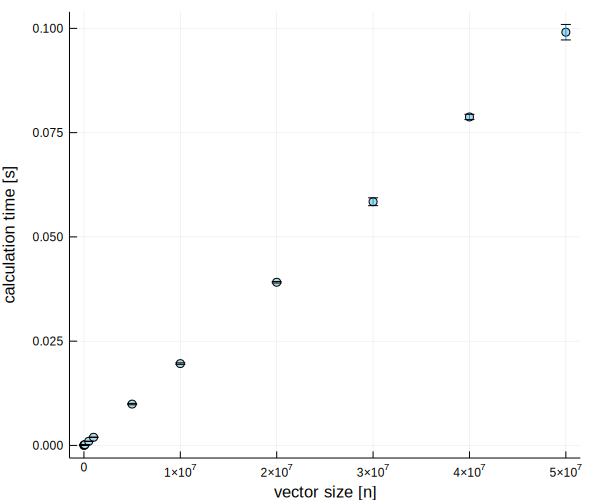

In [94]:
v_plot = scatter(
    vector_df[:size],
    vector_df[:time_mean],
    yerr = vector_df[:time_stddev],
    size = (600, 500),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "vector size [n]",
    ylabel = "calculation time [s]",
    label = "")

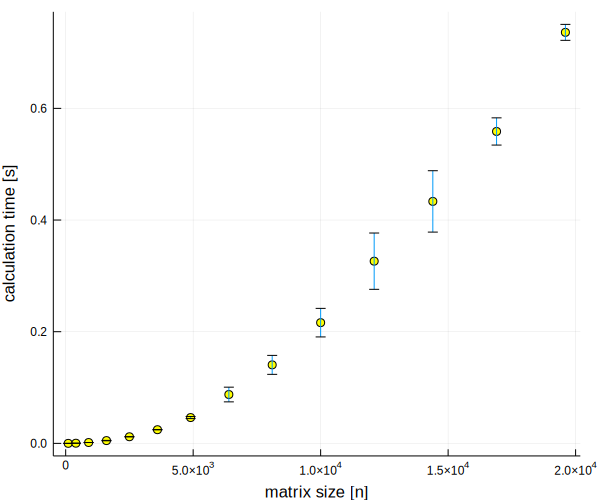

In [93]:
m_plot = scatter(
    matrix_df[:size],
    matrix_df[:time_mean],
    yerr = matrix_df[:time_stddev],
    size = (600, 500),
    markershape = :circle,
    markercolor = :yellow,
    xlabel = "matrix size [n]",
    ylabel = "calculation time [s]",
    label = "")

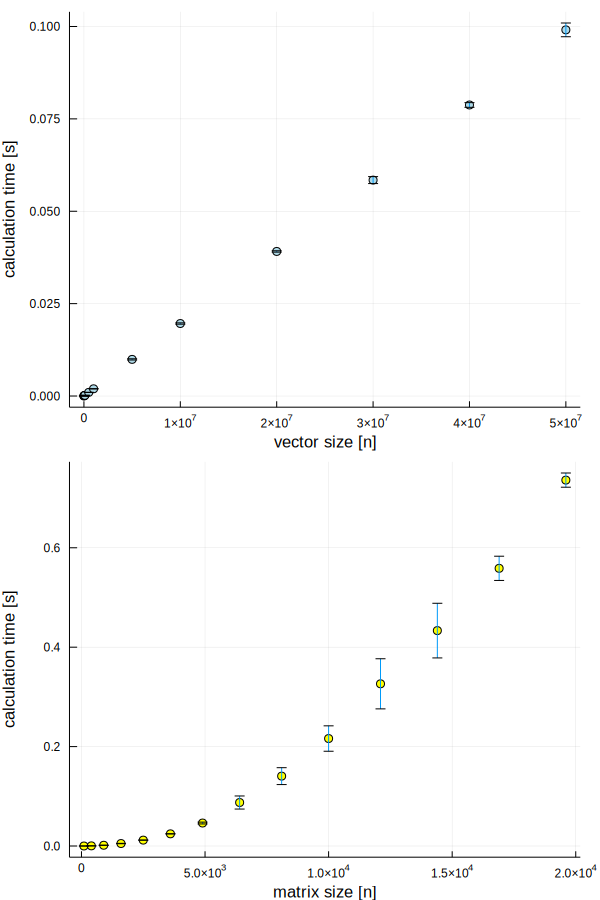

In [101]:
plot(v_plot, m_plot, layout = (2, 1), size = (600, 900))